In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3) #encoding="latin"

In [3]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df.shape

(1000, 2)

In [6]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [8]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import string
from nltk.corpus import stopwords

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [13]:
def text_process(msg):
    nopunc=[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [14]:
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [15]:
df['tokenized_Review']=df['Review'].apply(text_process)

In [16]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


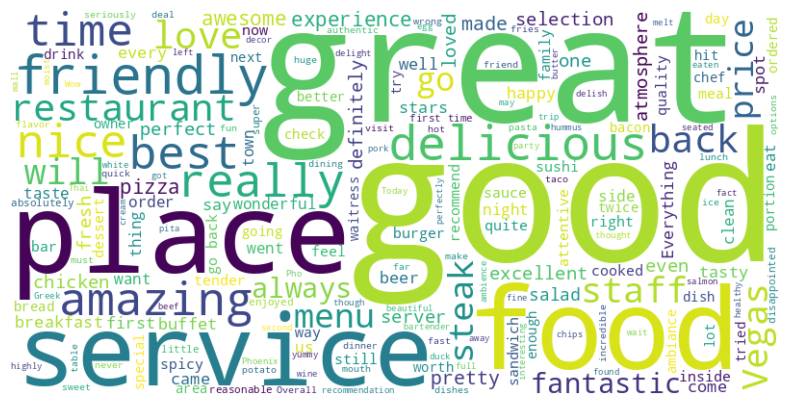

In [17]:
#import library
#positive reveiw

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
#generate a wordcloud object

wordcloud=WordCloud(width=800, height=400,background_color='white').generate(text)

#Display the word cloud object

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

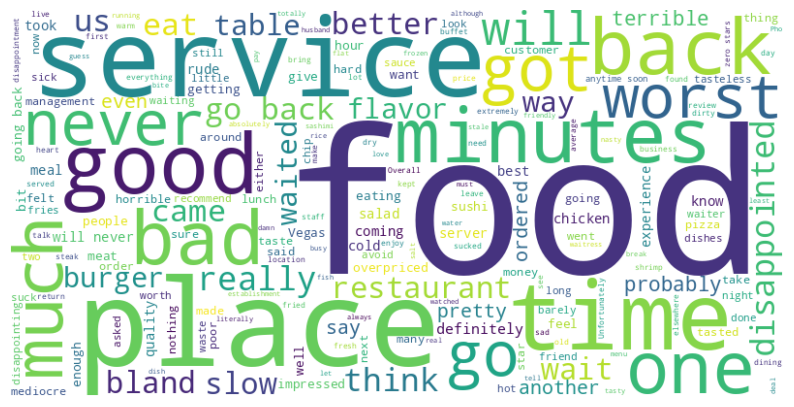

In [18]:
#import library
#Negative reveiw

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
#generate a wordcloud object

wordcloud=WordCloud(width=800, height=400,background_color='white').generate(text)

#Display the word cloud object

plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
vectorizer=CountVectorizer(max_df=0.9,min_df=10)
X=vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)

In [23]:
x_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [24]:
train_vectorized=vectorizer.transform(x_train)
test_vectorized=vectorizer.transform(x_test)

In [25]:
x_train_array=train_vectorized.toarray()
x_test_array=test_vectorized.toarray()

***1.Support Vector Machine***

In [26]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_array,y_train)

SVC()

In [27]:
y_train_preds_svc=svc.predict(x_train_array)
y_test_preds_svc=svc.predict(x_test_array)

In [28]:
y_test_preds_svc

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1])

In [29]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [30]:
pd.DataFrame({"actual_y_value":y_test, "predicted_y_value":y_test_preds_svc})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,0
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [31]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc,classification_report

In [32]:
def print_metrics(actual,predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual,predicted)))
  print('precision_score is {}'.format(precision_score(actual,predicted)))

  print('recall_score is {}'.format(recall_score(actual,predicted)))
  print('f1_score is {}'.format(f1_score(actual,predicted)))
  print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('classification_report is {}'.format(classification_report(actual,predicted)))

In [33]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_svc)

accuracy_score is 0.84875
precision_score is 0.9511400651465798
recall_score is 0.7336683417085427
f1_score is 0.8283687943262412
roc_auc_score is 0.8481774544363608
confusion_matrix is [[387  15]
 [106 292]]
classification_report is               precision    recall  f1-score   support

           0       0.78      0.96      0.86       402
           1       0.95      0.73      0.83       398

    accuracy                           0.85       800
   macro avg       0.87      0.85      0.85       800
weighted avg       0.87      0.85      0.85       800



In [34]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_svc)

accuracy_score is 0.745
precision_score is 0.8148148148148148
recall_score is 0.6470588235294118
f1_score is 0.7213114754098361
roc_auc_score is 0.7469987995198079
confusion_matrix is [[83 15]
 [36 66]]
classification_report is               precision    recall  f1-score   support

           0       0.70      0.85      0.76        98
           1       0.81      0.65      0.72       102

    accuracy                           0.74       200
   macro avg       0.76      0.75      0.74       200
weighted avg       0.76      0.74      0.74       200



In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_preds_svc)

In [36]:
cm

array([[83, 15],
       [36, 66]])

Text(95.72222222222221, 0.5, 'Actual values')

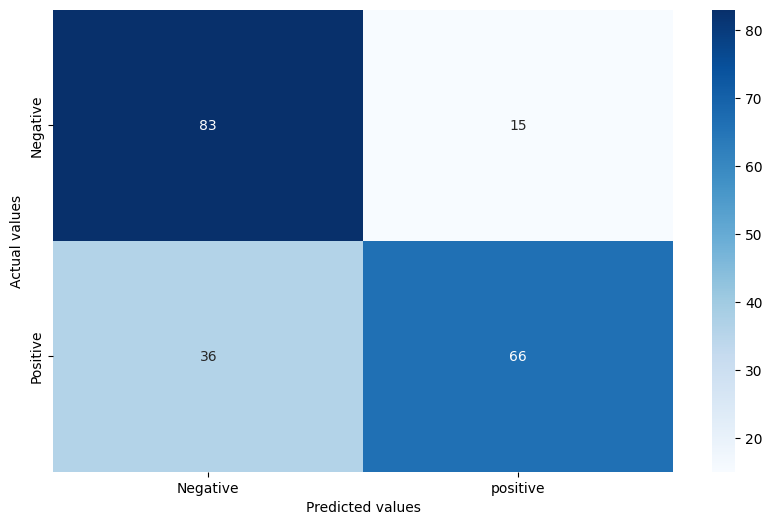

In [37]:
from pandas.core.indexes.interval import InvalidIndexError
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["Negative","positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**2.Logistic Regression**


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lor=LogisticRegression()
lor.fit(x_train_array,y_train)

LogisticRegression()

In [40]:
y_train_preds_lor=lor.predict(x_train_array)
y_test_preds_lor=lor.predict(x_test_array)

In [41]:
y_test_preds_lor

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [42]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_lor)

accuracy_score is 0.7875
precision_score is 0.85625
recall_score is 0.6884422110552764
f1_score is 0.7632311977715877
roc_auc_score is 0.7870071751793793
confusion_matrix is [[356  46]
 [124 274]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.89      0.81       402
           1       0.86      0.69      0.76       398

    accuracy                           0.79       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.79      0.79       800



In [43]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_lor)

accuracy_score is 0.775
precision_score is 0.8064516129032258
recall_score is 0.7352941176470589
f1_score is 0.7692307692307693
roc_auc_score is 0.7758103241296519
confusion_matrix is [[80 18]
 [27 75]]
classification_report is               precision    recall  f1-score   support

           0       0.75      0.82      0.78        98
           1       0.81      0.74      0.77       102

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



In [98]:
#Hyper parameter tuning
import numpy as np
best_accuracy=0.0
alpha_val=0

for i in np.arange(0.01,1.1,0.1):
  temp_cls=LogisticRegression(C=i)
  temp_cls.fit(x_train_array,y_train)
  y_test_pred_h_nbayes=temp_cls.predict(x_test_array)
  score=accuracy_score(y_test,y_test_preds_lor)
  print("accuracy score for alpha-{} is:{}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
      best_accuracy=score
      best_C=i
  print("....................................................")
  print("the best accuarcy is {}% with alpha value as {}".format(round(best_accuracy*100,2),round(best_C,1)))

accuracy score for alpha-0.0 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.1 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.2 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.3 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.4 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.5 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accuracy score for alpha-0.6 is:77.5%
....................................................
the best accuarcy is 77.5% with alpha value as 0.0
accura

In [44]:
cm=confusion_matrix(y_test,y_test_preds_lor)

In [45]:
cm

array([[80, 18],
       [27, 75]])

Text(95.72222222222221, 0.5, 'Actual values')

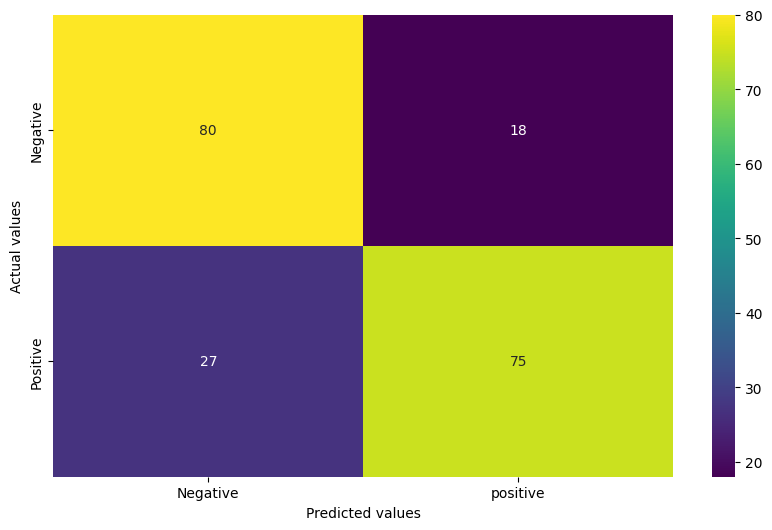

In [46]:
from pandas.core.indexes.interval import InvalidIndexError
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="viridis",xticklabels=["Negative","positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**3.Random Forest Classifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC=RandomForestClassifier()
RFC.fit(x_train_array,y_train)

RandomForestClassifier()

In [49]:
y_train_preds_RFC=RFC.predict(x_train_array)
y_test_preds_RFC=RFC.predict(x_test_array)

In [50]:
y_test_preds_RFC

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1])

In [51]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_RFC)

accuracy_score is 0.90375
precision_score is 0.952112676056338
recall_score is 0.8492462311557789
f1_score is 0.8977423638778219
roc_auc_score is 0.9034788369709243
confusion_matrix is [[385  17]
 [ 60 338]]
classification_report is               precision    recall  f1-score   support

           0       0.87      0.96      0.91       402
           1       0.95      0.85      0.90       398

    accuracy                           0.90       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.90      0.90       800



In [52]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_RFC)

accuracy_score is 0.73
precision_score is 0.7553191489361702
recall_score is 0.696078431372549
f1_score is 0.7244897959183673
roc_auc_score is 0.7306922769107643
confusion_matrix is [[75 23]
 [31 71]]
classification_report is               precision    recall  f1-score   support

           0       0.71      0.77      0.74        98
           1       0.76      0.70      0.72       102

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [53]:
cm=confusion_matrix(y_test,y_test_preds_RFC)

In [54]:
cm

array([[75, 23],
       [31, 71]])

Text(95.72222222222221, 0.5, 'Actual values')

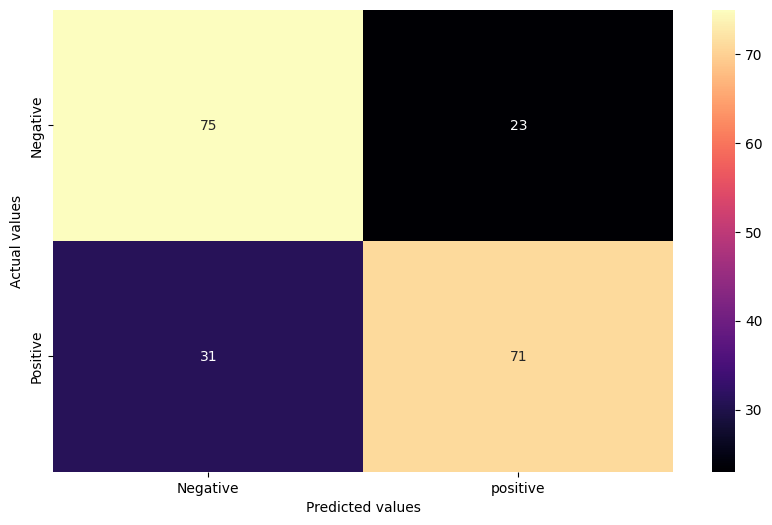

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="magma",xticklabels=["Negative","positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


**4.Gradient Boosting Classifier **

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train_array,y_train)

GradientBoostingClassifier()

In [58]:
y_train_preds_gbc=gbc.predict(x_train_array)
y_test_preds_gbc=gbc.predict(x_test_array)

In [59]:
y_test_preds_gbc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [60]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_gbc)

accuracy_score is 0.81125
precision_score is 0.955719557195572
recall_score is 0.6507537688442211
f1_score is 0.7742899850523168
roc_auc_score is 0.8104515112877823
confusion_matrix is [[390  12]
 [139 259]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.97      0.84       402
           1       0.96      0.65      0.77       398

    accuracy                           0.81       800
   macro avg       0.85      0.81      0.81       800
weighted avg       0.85      0.81      0.81       800



In [61]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_gbc)

accuracy_score is 0.74
precision_score is 0.8289473684210527
recall_score is 0.6176470588235294
f1_score is 0.7078651685393259
roc_auc_score is 0.7424969987995198
confusion_matrix is [[85 13]
 [39 63]]
classification_report is               precision    recall  f1-score   support

           0       0.69      0.87      0.77        98
           1       0.83      0.62      0.71       102

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200



In [62]:
cm=confusion_matrix(y_test,y_test_preds_gbc)

In [63]:
cm

array([[85, 13],
       [39, 63]])

Text(95.72222222222221, 0.5, 'Actual values')

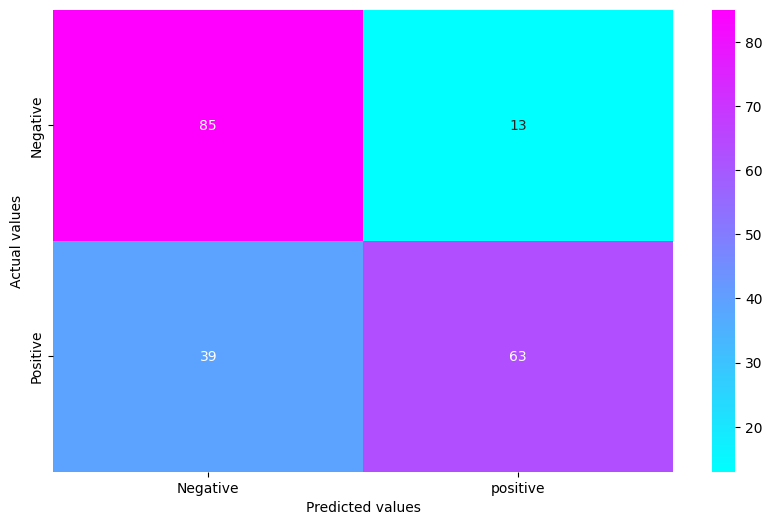

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="cool",xticklabels=["Negative","positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

**5.KNeighborsClassifier**

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knc=KNeighborsClassifier()
knc.fit(x_train_array,y_train)

KNeighborsClassifier()

In [84]:
y_train_preds_knc=knc.predict(x_train_array)
y_test_preds_knc=knc.predict(x_test_array)

In [85]:
y_test_preds_knc

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1])

In [86]:
#Evaluation of training model
print_metrics(y_train,y_train_preds_knc)

accuracy_score is 0.7725
precision_score is 0.8157894736842105
recall_score is 0.7010050251256281
f1_score is 0.754054054054054
roc_auc_score is 0.7721443036075902
confusion_matrix is [[339  63]
 [119 279]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.82      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



In [87]:
#Evaluation of testing model
print_metrics(y_test,y_test_preds_knc)

accuracy_score is 0.675
precision_score is 0.7126436781609196
recall_score is 0.6078431372549019
f1_score is 0.6560846560846562
roc_auc_score is 0.6763705482192878
confusion_matrix is [[73 25]
 [40 62]]
classification_report is               precision    recall  f1-score   support

           0       0.65      0.74      0.69        98
           1       0.71      0.61      0.66       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200



In [71]:
cm=confusion_matrix(y_test,y_test_preds_knc)

In [72]:
cm

array([[73, 25],
       [40, 62]])

Text(95.72222222222221, 0.5, 'Actual values')

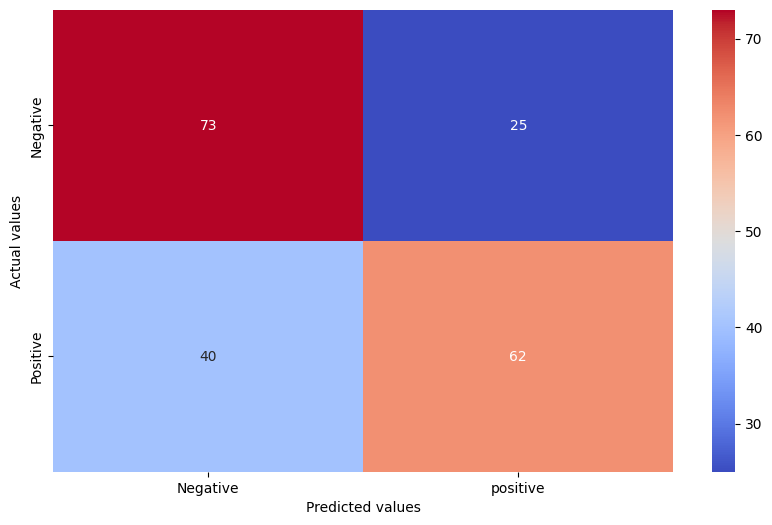

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="coolwarm",xticklabels=["Negative","positive"],yticklabels=["Negative","Positive"])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [88]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
cv=CountVectorizer(max_features=1500)
ps=PorterStemmer()


In [89]:
import re
for i in range(0,1000):
  review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=str(df['Review'][i]))
  review=review.lower()
  review_words=review.split()
  review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review_words]
  review=' '.join(review)

In [92]:
import re
def predict_sentiment(sample_review):
  sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
  sample_review_words=sample_review.lower()
  sample_review_words=sample_review.split()
  sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=nltk.PorterStemmer()
  final_review=[ps.stem(word) for word in sample_review_words]
  final_review=' '.join(final_review)

  temp=cv.transform([final_review]).toarray()
  return lor.predict(temp)